Primero se realiza la carga de las librerías que serán utilizadas en todo el proyecto

In [ ]:
from numbers import Number
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import os
import zipfile
from google.colab import files
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import json
import random
from PIL import Image
from collections import Counter
from google.colab import drive

# Mount Google Drive
#drive.mount('/content/drive')

In [ ]:
# Creación directorio
os.makedirs("dataset", exist_ok = True)

In [ ]:
kaggle_con = {"username":"aburrido","key":"bcd911c77fd92cee6ca512233491b67f"}

with open('kaggle.json', 'w') as archivo:
    json.dump(kaggle_con, archivo)

!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

In [ ]:
!pip install kaggle
!kaggle datasets download -d yousefmohamed20/oxford-102-flower-dataset

Dataset URL: https://www.kaggle.com/datasets/yousefmohamed20/oxford-102-flower-dataset
License(s): CC0-1.0
 99% 328M/331M [00:19<00:00, 17.8MB/s]
100% 331M/331M [00:20<00:00, 17.3MB/s]


In [ ]:
zip = "/content/oxford-102-flower-dataset.zip"
dataset = "/content/dataset"
with zipfile.ZipFile(zip, "r") as zip_d:
  zip_d.extractall(dataset)

# **Entendimiento y Preparación de los Datos**

## **1. Análisis Exploratorio de los Datos**
---


### **1.1. Resumen General**

In [ ]:
#@title
path_ = "dataset/102 flower/flowers"
n_image = 0
formats = []
conteo_formato = {}
tamanio_total = 0

for i in os.listdir(path_):
  for j in os.listdir(os.path.join(path_, i)):
    for k in os.listdir(os.path.join(path_, i, j)):
      n_image += 1
      formats.append(os.path.splitext(k)[1])
      tamanio_total += os.path.getsize(os.path.join(path_, i, j, k))

for i in formats:
  if i in conteo_formato:
    conteo_formato[i] += 1
  else:
    conteo_formato[i] = 1

tamanio_total = np.round(tamanio_total/(1024**2), 2)

print(f"El conjunto de datos consta de un total de {n_image} imágenes")
for i in conteo_formato:
  print(f"Con el formato {i} se tiene {conteo_formato[i]} documentos")
print(f"Los documentos tienen un peso total de {tamanio_total} MB")

El conjunto de datos consta de un total de 8189 imágenes
Con el formato .jpg se tiene 8189 documentos
Los documentos tienen un peso total de 330.74 MB


### **1.2. Resumen de la Calidad de los datos**
---

Revisión de los tamaños de las imágenes


In [ ]:
#@title Ancho y Alto de las imágenes
# Definir la ruta de las imágenes de entrenamiento
root_dir = 'dataset/102 flower/flowers/train'

# Iterar sobre cada carpeta de categorías
for category in os.listdir(root_dir):
    category_dir = os.path.join(root_dir, category)

    # Listas para guardar las resoluciones de las imágenes
    widths = []
    heights = []

    # Iterar sobre cada imagen en la carpeta de cada categoría
    for filename in os.listdir(category_dir):
        image_path = os.path.join(category_dir, filename)

        # Abrir el archivo de la imagen
        with Image.open(image_path) as img:
            # Extraer la resolución de la imagen
            width, height = img.size
            widths.append(width)
            heights.append(height)

    # Calcular min, max, promedio y desviación estándar de las resoluciones
    min_width=min(widths)
    max_width=max(widths)
    min_height=min(heights)
    max_height=max(heights)
    mean_width = np.mean(widths)
    mean_height = np.mean(heights)
    std_width = np.std(widths)
    std_height = np.std(heights)

    # Imprimir por cada categoría
    print(f'Categoría: {category}')
    print(f'Rango - Ancho: {min_width} - {max_width}, Rango - Altura: {min_height} - {max_height}')
    print(f'Ancho Promedio: {mean_width}, Altura Promedio: {mean_height}')
    print(f'Desviación Estándar Ancho: {std_width}, Desviación Estándar Altura: {std_height}')
    print('\n')

Categoría: 40
Rango - Ancho: 500 - 825, Rango - Altura: 500 - 669
Ancho Promedio: 624.4074074074074, Altura Promedio: 507.77777777777777
Desviación Estándar Ancho: 83.62050929502848, Desviación Estándar Altura: 29.93367153153827


Categoría: 15
Rango - Ancho: 500 - 781, Rango - Altura: 500 - 766
Ancho Promedio: 613.7105263157895, Altura Promedio: 529.3947368421053
Desviación Estándar Ancho: 80.48206988769115, Desviación Estándar Altura: 70.25575064444874


Categoría: 79
Rango - Ancho: 500 - 747, Rango - Altura: 500 - 774
Ancho Promedio: 634.2941176470588, Altura Promedio: 516.2647058823529
Desviación Estándar Ancho: 78.34371081472624, Desviación Estándar Altura: 51.444606887939884


Categoría: 89
Rango - Ancho: 500 - 905, Rango - Altura: 500 - 753
Ancho Promedio: 647.8366013071895, Altura Promedio: 512.7058823529412
Desviación Estándar Ancho: 72.14595387368797, Desviación Estándar Altura: 43.5505689618539


Categoría: 6
Rango - Ancho: 500 - 752, Rango - Altura: 500 - 751
Ancho Promedio

Inspección visual de las imágenes 

**Nota:** Se hace una muestra de las imágenes, pues la impresión de las imágenes genera mucho peso al documento final.

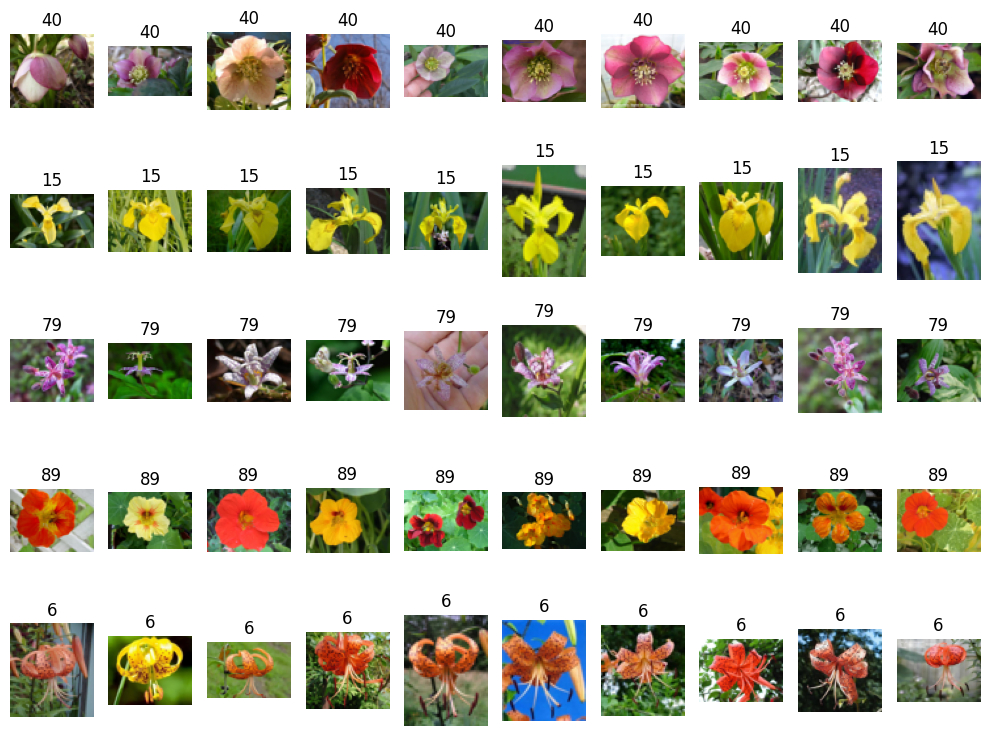

In [ ]:
#@title Miniaturas de las categorías de flores
# Definir la ruta de las imágenes de entrenamiento
root_dir = 'dataset/102 flower/flowers/train'

# Definir el tamaño de la matriz de imágenes (número de filas y de columnas)
images_per_row = 10
rows_per_plot = 10
num_rows = 5  # Cambiar el número de filas aquí

# Definir el tamaño de las miniaturas
thumbnail_size = (64, 64)

# Lista de todas las carpetas/categorías
categories = os.listdir(root_dir)[:10]

# Calcular el número total de plots necesarios para mostrar todas las categorías
num_plots = (len(categories) + rows_per_plot - 1) // rows_per_plot

# Iterar sobre cada plot
for plot_index in range(num_plots):
    # Calcular los índices de inicio y fin por categorías en el plot actual
    start_index = plot_index * rows_per_plot
    end_index = min((plot_index + 1) * rows_per_plot, len(categories))

    # Crear la figura para mostrar imágenes
    fig, axs = plt.subplots(num_rows, rows_per_plot, figsize=(10, 8))  # Modificar el tamaño de la figura aquí

    # Iterar sobre las categorías del plot actual
    for i, category_index in enumerate(range(start_index, end_index)):
        category = categories[category_index]
        category_dir = os.path.join(root_dir, category)

        # Lista todas las imágenes en la carpeta de la categoría
        image_files = os.listdir(category_dir)

        # Muestra aleatoria de cada categoría
        sampled_images = random.sample(image_files, min(images_per_row, len(image_files)))

        # Verificar que el índice 'i' no exceda el número de filas
        if i < num_rows:
            # Iterar sobre las imágenes de muestra y mostrar thumbnails
            for j, image_filename in enumerate(sampled_images):
                image_path = os.path.join(category_dir, image_filename)

                try:
                    # Abrir la imagen y reescalarla
                    with Image.open(image_path) as img:
                        img.thumbnail(thumbnail_size)
                        img_array = img.convert('RGB')

                    # Graficar la miniatura
                    axs[i, j].imshow(img_array)
                    axs[i, j].axis('off')
                    axs[i, j].set_title(category)
                except Exception as e:
                    print(f"Error al procesar la imagen {image_filename}: {e}")

    # Ajustar el diseño para dejar espacio para la figura más grande
    plt.tight_layout(rect=[0, 0, 1, 0.96])

    # Mostrar el plot
    plt.show()

## **2. Limpieza de los Datos**
---


### **2.1 Imágenes conjunto Entrenamiento**

In [ ]:
all_images = []
labels = []
for i in range(1,102,1):
    cat_path = f"dataset/102 flower/flowers/train/{i}/"
    for im_path in os.listdir(cat_path):
        all_images.append(np.array(tf.keras.preprocessing.image.load_img(cat_path+im_path,
                                                                         target_size=(224, 224, 3))))
        labels.append(i)

X_train = np.array(all_images)
Y_train = np.array(labels)

Adicionalmente, se realiza un análisis en la distribución de la cantidad de imágenes en cada categoría para el conjunto de entrenamiento, encontrando que las categorías tienen de 27 a 206 imágenes, dato relevante, ya que será teniendo en cuenta posteriormente para la elección del modelo a usar.

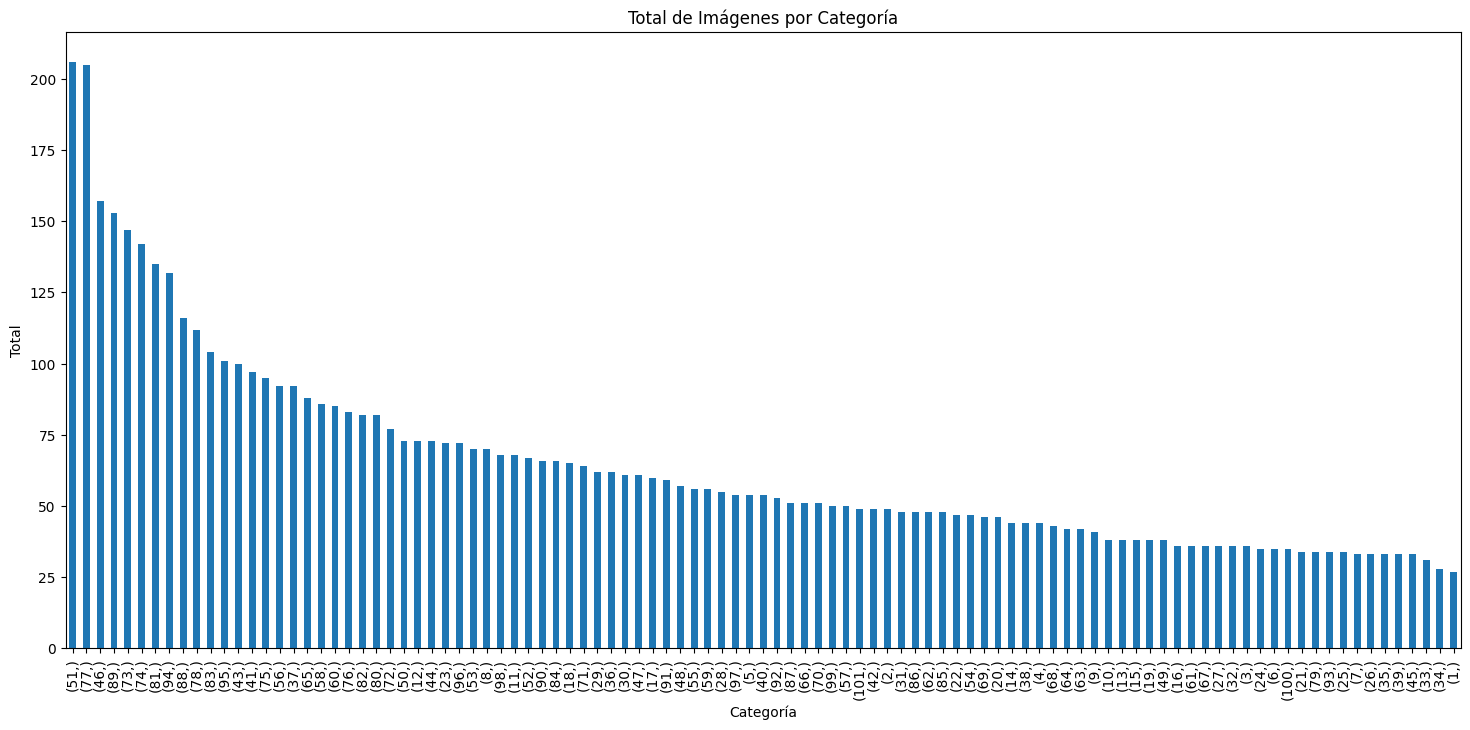

In [ ]:
plt.figure(figsize=(18, 8))

cat_train = pd.DataFrame(Y_train).value_counts().plot(kind='bar')

plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Total de Imágenes por Categoría')

plt.show()

### **2.2 Imágenes conjunto Validación**

In [ ]:
all_images = []
labels = []
for i in range(1,102,1):
    cat_path = f"dataset/102 flower/flowers/valid/{i}/"
    for im_path in os.listdir(cat_path):
        all_images.append(np.array(tf.keras.preprocessing.image.load_img(cat_path+im_path,
                                                                         target_size=(224, 224, 3))))
        labels.append(i)

X_valid = np.array(all_images)
Y_valid = np.array(labels)

Referente a la distribución de la cantidad de imágenes en cada categoría para el conjunto de validación, se encuentra que las categorías tienen de 1 a 28 imágenes.

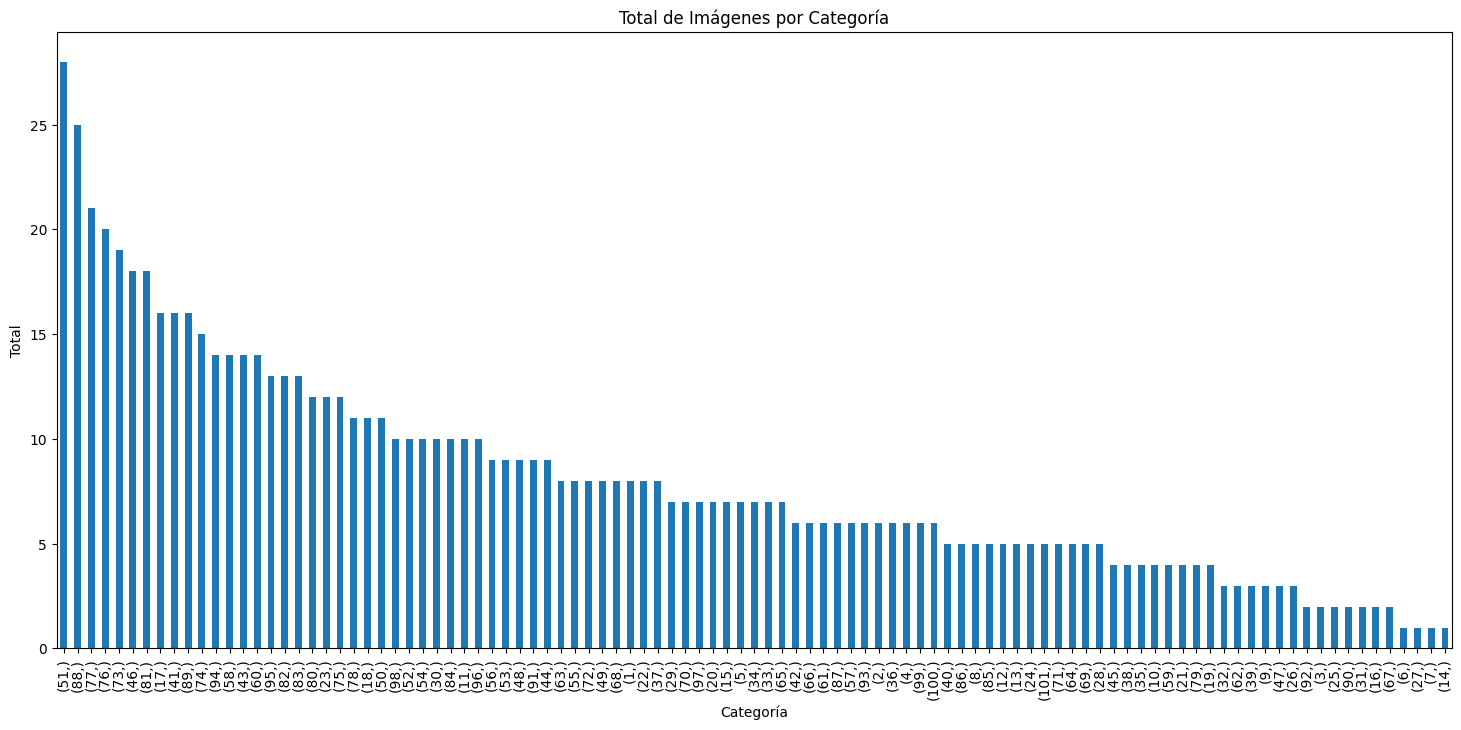

In [ ]:
plt.figure(figsize=(18, 8))
cat_valid  = pd.DataFrame(Y_valid).value_counts().plot(kind='bar')

plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Total de Imágenes por Categoría')

plt.show()

### **2.3 Imagenes Conjunto Test**

In [ ]:
all_images = []
labels = []
for i in range(1,102,1):
    cat_path = f"dataset/102 flower/flowers/test/{i}/"
    for im_path in os.listdir(cat_path):
        all_images.append(np.array(tf.keras.preprocessing.image.load_img(cat_path+im_path,
                                                                         target_size=(224, 224, 3))))
        labels.append(i)

X_test = np.array(all_images)
Y_test = np.array(labels)

Referente a la distribución de la cantidad de imágenes en cada categoría para el conjunto de pruebas, se encuentra que las categorías tienen de 2 a 28 imágenes.

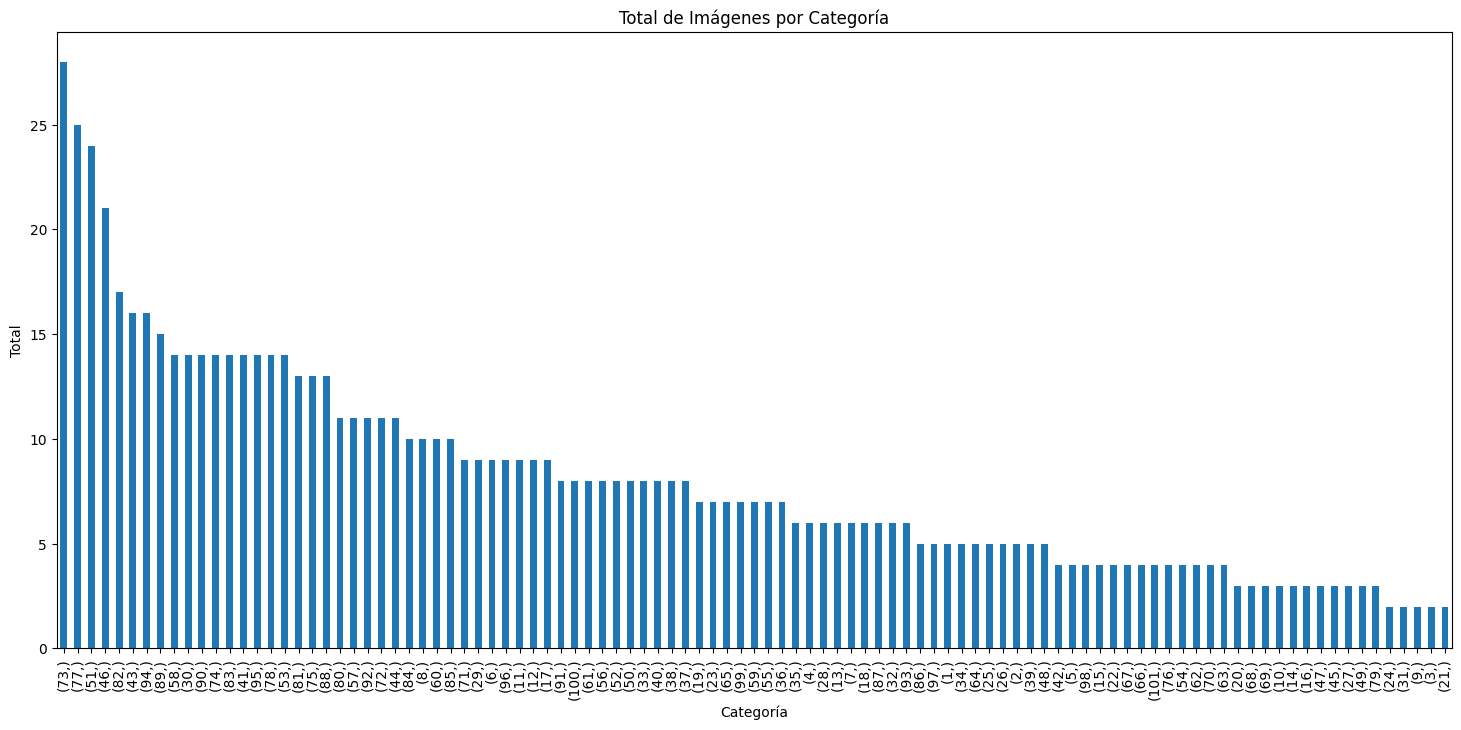

In [ ]:
plt.figure(figsize=(18, 8))

cat_test = pd.DataFrame(Y_test).value_counts().plot(kind='bar')

plt.xlabel('Categoría')
plt.ylabel('Total')
plt.title('Total de Imágenes por Categoría')

plt.show()